In [5]:
import numpy as np
import pandas as pd

In [6]:
Ballon = pd.read_csv ("laptopData.csv")

In [7]:
Ballon.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
Ballon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1253 non-null   object 
 3   Inches            1220 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1259 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1259 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [9]:
Ballon.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [10]:
Ballon.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [11]:
Ballon.shape

(1303, 12)

In [12]:
Ballon.size

15636

In [13]:
category = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'ScreenResolution', 'Memory']
Ballon[category] = Ballon[category].apply(lambda col: col.fillna(col.mode()[0]))


In [14]:
Ballon = Ballon.drop("Unnamed: 0",axis=1)

In [15]:
count = Ballon.groupby('TypeName').size()['2 in 1 Convertible']
print("2 in 1 Convertible", count, "times")


2 in 1 Convertible 114 times


In [16]:
Ballon['Price'] = Ballon.groupby('Company')['Price'].transform(lambda x: x.fillna(x.median()))

In [17]:
Ballon

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [18]:
import numpy as np

null_mask = np.any(pd.isnull(Ballon.values), axis=1)
null_rows = Ballon[null_mask]
print(null_rows)


     Company            TypeName Inches  \
18    Lenovo            Notebook   15.6   
20    Lenovo            Notebook    NaN   
24        HP           Ultrabook   15.6   
46    Lenovo            Notebook    NaN   
50    Lenovo            Notebook    NaN   
...      ...                 ...    ...   
1211    Asus            Notebook    NaN   
1212     MSI              Gaming    NaN   
1213    Dell  2 in 1 Convertible    NaN   
1214    Asus              Gaming    NaN   
1245  Lenovo            Notebook    NaN   

                               ScreenResolution                          Cpu  \
18                            Full HD 1920x1080   Intel Core i3 7100U 2.4GHz   
20                            Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
24                            Full HD 1920x1080   Intel Core i7 8550U 1.8GHz   
46                            Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
50                            Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   
...

In [19]:
Ballon = Ballon.dropna(how='all')
Ballon = Ballon[~(Ballon == '').all(axis=1)]

In [20]:
Ballon.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [21]:
# Extracted Ram
Ballon["Ram"] = Ballon["Ram"].str.extract(r'(\d+)')


In [22]:
# Converted RAm into Numeric
Ballon['Ram'] = Ballon['Ram'].apply(pd.to_numeric, errors='coerce')


In [23]:
#  FILLED THE RAM USING FFILL AND BFILL
Ballon["Ram"] = Ballon["Ram"].ffill().bfill()

In [24]:
# Extracted Weight
Ballon["Weight"] = Ballon["Weight"].str.extract(r'(\d+)')

In [25]:
# Converted Weight into Numeric
Ballon['Weight'] = Ballon['Weight'].apply(pd.to_numeric, errors='coerce')

In [26]:
#Inches converted From Object to Flot
Ballon['Inches'] = Ballon['Inches'].apply(pd.to_numeric, errors='coerce')

In [27]:
# Weight FIlled the NUll Values Using Fillna BY Finding Mean
Ballon['Weight'] = Ballon['Weight'].fillna(Ballon['Weight'].mean())

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt

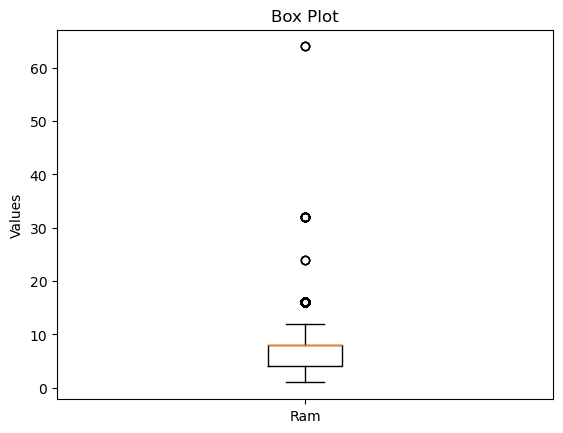

In [29]:
#Finding The Outlayeras
plt.boxplot(Ballon[['Ram']])
plt.xticks([1],['Ram'])
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

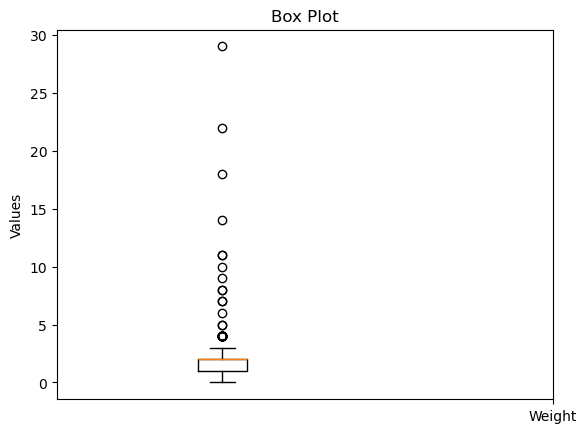

In [30]:
#Finding The Outlayeras for weight
plt.boxplot(Ballon[['Weight']])
plt.xticks([2],['Weight'])
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

ConversionError: Failed to convert value(s) to axis units: ['Inches']

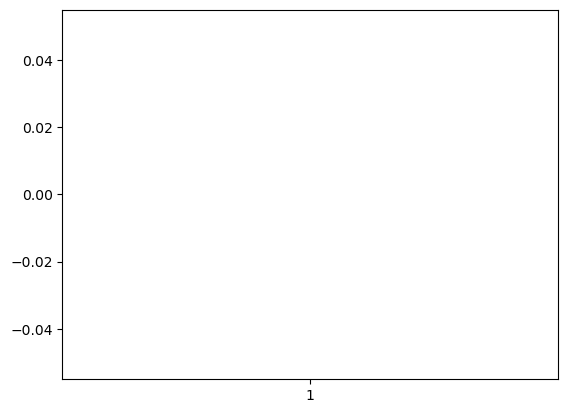

In [31]:
#Finding The Outlayeras
plt.boxplot(Ballon['Inches'])
plt.xticks(['Inches'])
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

In [ ]:
q3 = Ballon['Weight'].quantile(0.75)
q1 = Ballon['Weight'].quantile(0.25)
iqr = q3 - q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

med_val=Ballon['Weight'].median()

Ballon.loc[(Ballon['Weight']<lower_bound) | (Ballon['Weight']>upper_bound),'Weight']=round(med_val,0)

In [ ]:
#Removed The Outlayeras for weight
plt.boxplot(Ballon[['Weight']])
plt.xticks([2],['Weight'])
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

In [ ]:

sns.histplot(Ballon['Inches'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Screen Size (Inches)')
plt.tight_layout()
plt.show()


In [ ]:
sns.histplot(Ballon['Ram'], bins=15, kde=True, color='lightgreen')
plt.title('Distribution of RAM (GB)')
plt.tight_layout()
plt.show()





In [ ]:
sns.histplot(Ballon['Price'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()




In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Ballon, x='Ram', y='Price')
plt.title('Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Sort CPUs by median price for better visual order
cpu_order = Ballon.groupby('Cpu')['Price'].median().sort_values().index

sns.boxplot(data=Ballon, x='Cpu', y='Price', order=cpu_order)

plt.title('Price vs. Cpu Type', fontsize=14)
plt.xlabel('CPU Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate with alignment
plt.tight_layout()  # Adjusts padding to fit everything neatly
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Ballon['Cpu_Brand'] = Ballon['Cpu'].apply(lambda x: x.split()[0])

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Cpu_Brand',
    y='Price',
    data=Ballon,
     
)
plt.title('Price vs. CPU Brand', fontsize=14)
plt.xlabel('CPU Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Ballon['Gpu_Brand'] = Ballon['Gpu'].apply(lambda x: x.split()[0])

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Gpu_Brand',
    y='Price',
    data=Ballon,
     
)
plt.title('Price vs. GPU Brand', fontsize=14)
plt.xlabel('GPU Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Ballon, x='Inches', y='Weight')
plt.title('Screen Size vs. Weight')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

In [ ]:
#MULTIVARIENT
corr_matrix = Ballon.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
features = ['Price', 'Ram', 'Inches', 'Weight']
sns.pairplot(Ballon[features])
plt.suptitle('Pairwise Plots of Laptop Features', y=1.02)
plt.show()

In [ ]:
Ballon['Cpu_Brand'] = Ballon['Cpu'].str.split().str[0]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cpu_Brand', y='Price', hue='Ram', data=Ballon, palette='Spectral')
plt.title('Price by CPU Brand and RAM')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

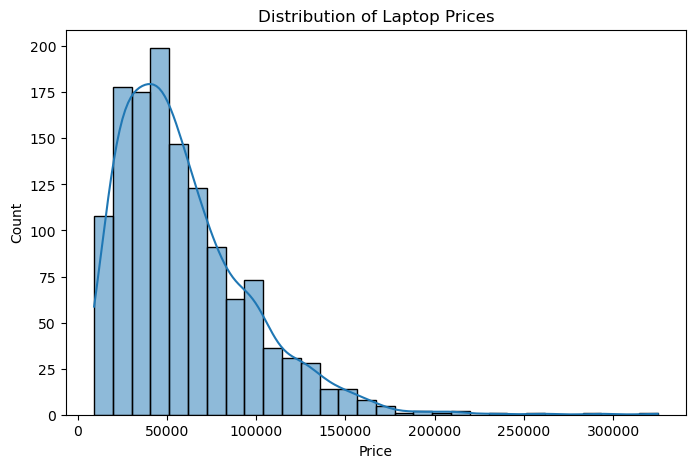

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(Ballon['Price'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

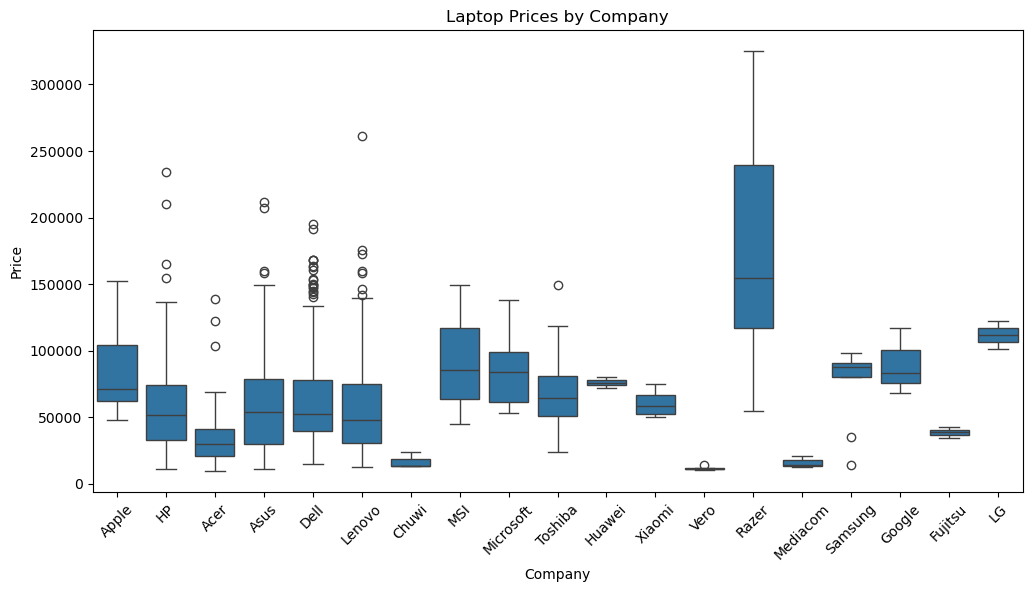

In [33]:
# Boxplot: Price by Company
plt.figure(figsize=(12,6))
sns.boxplot(data=Ballon, x='Company', y='Price')
plt.xticks(rotation=45)
plt.title('Laptop Prices by Company')
plt.show()


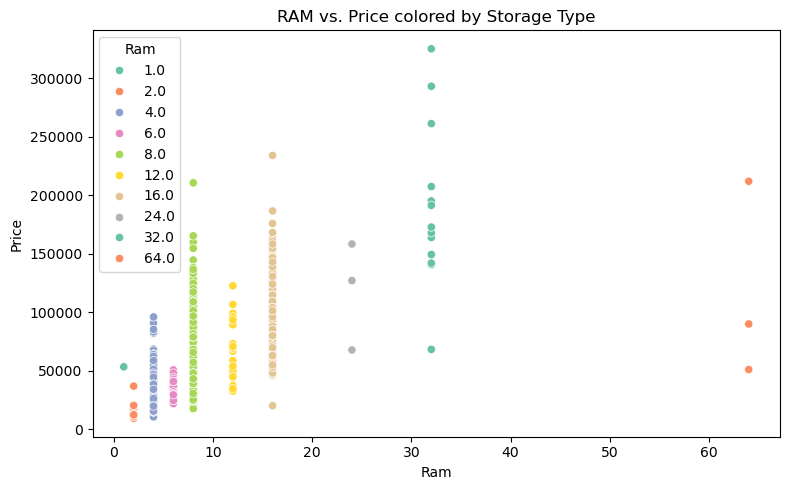

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Ram', y='Price', data=Ballon, hue='Ram', palette='Set2')
plt.title('RAM vs. Price colored by Storage Type')
plt.tight_layout()
plt.show()

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Drop rows with missing values in relevant columns
Ballon = Ballon.dropna(subset=['Company', 'TypeName', 'Price'])

# Define the model: Price explained by Company and Category, including interaction
model = ols('Price ~ C(Company) + C(TypeName) + C(Company):C(TypeName)', data=Ballon).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-Way ANOVA Results:")
print(anova_table)
alpha = 0.05

for factor in anova_table.index:

    p = anova_table.loc[factor, 'PR(>F)']
    if p < alpha:
        print(f" {factor}: Significant effect (p = {p:.4f}) - Reject Ho")
    else:

        print(f" {factor}: Not significant (p = {p:.4f}) - Fail to reject Ho")

Two-Way ANOVA Results:
                              sum_sq      df             F        PR(>F)
C(Company)             -1.181678e-01    18.0 -9.119131e-12  1.000000e+00
C(TypeName)                      NaN     5.0           NaN           NaN
C(Company):C(TypeName)  5.692525e+11    90.0  8.785962e+00  1.748715e-42
Residual                9.027565e+11  1254.0           NaN           NaN
 C(Company): Not significant (p = 1.0000) - Fail to reject Ho
 C(TypeName): Not significant (p = nan) - Fail to reject Ho
 C(Company):C(TypeName): Significant effect (p = 0.0000) - Reject Ho
 Residual: Not significant (p = nan) - Fail to reject Ho
